In [1]:
import os, time, random
import numpy as np
import pandas as pd
import cv2, torch
from tqdm.auto import tqdm
import shutil as sh

from IPython.display import Image, clear_output
import matplotlib.pyplot as plt

In [2]:
img_h, img_w, num_channels = (380, 676, 3)
data = pd.read_csv('train_solution_bounding_boxes (1).csv')
data.rename(columns={'image':'image_id'}, inplace=True)
data['image_id'] = data['image_id'].apply(lambda x: x.split('.')[0])
data['x_center'] = (data['xmin'] + data['xmax'])/2
data['y_center'] = (data['ymin'] + data['ymax'])/2
data['w'] = data['xmax'] - data['xmin']
data['h'] = data['ymax'] - data['ymin']
data['classes'] = 0
data['x_center'] = data['x_center']/img_w
data['w'] = data['w']/img_w
data['y_center'] = data['y_center']/img_h
data['h'] = data['h']/img_h
data.head()

,image_id,xmin,ymin,xmax,ymax,x_center,y_center,w,h,classes
0,vid_4_1000,281.259045,187.035071,327.727931,223.225547,0.450434,0.539817,0.068741,0.095238,0
1,vid_4_10000,15.163531,187.035071,120.329957,236.430180,0.100217,0.557191,0.155572,0.129987,0
2,vid_4_10040,239.192475,176.764801,361.968162,236.430180,0.444645,0.543678,0.181621,0.157014,0
3,vid_4_10020,496.483358,172.363256,630.020260,231.539575,0.833213,0.531451,0.197540,0.155727,0
4,vid_4_10060,16.630970,186.546010,132.558611,238.386422,0.110347,0.559122,0.171491,0.136422,0


In [3]:
index = list(set(data.image_id))
image = random.choice(index)
print("Image ID: %s"%(image))
img = cv2.imread(f'training_images/{image}.jpg')
img.shape

Image ID: vid_4_19780


(380, 676, 3)

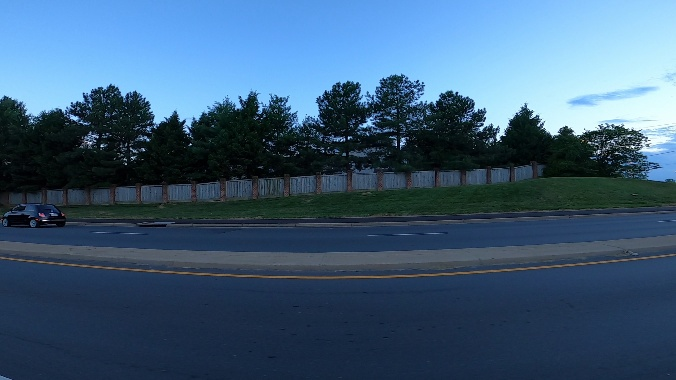

In [4]:
image = random.choice(index)
Image(filename=f'training_images/{image}.jpg',width=600)

In [5]:
src = 'training_images'
if True:
    for v in [0]:
        val_index = index[0:len(index)*(v+1)//5]
        for name,mini in tqdm(data.groupby('image_id')):
            if name in val_index:
                fname = 'values/'
            else:
                fname = 'train/'
            if not os.path.exists('NEW/fold{}/labels/'.format(v)+fname):
                os.makedirs('NEW/fold{}/labels/'.format(v)+fname)
            with open('NEW/fold{}/labels/'.format(v)+fname+name+".txt", 'w+') as f:
                row = mini[['classes','x_center','y_center','w','h']].astype(float).values
                row = row.astype(str)
                for j in range(len(row)):
                    text = ' '.join(row[j])
                    f.write(text)
                    f.write("\n")
            if not os.path.exists('NEW/fold{}/images/{}'.format(v,fname)):
                os.makedirs('NEW/fold{}/images/{}'.format(v,fname))
            sh.copy("{}/{}.jpg".format(src,name),'NEW/fold{}/images/{}/{}.jpg'.format(v,fname,name))

  0%|          | 0/355 [00:00<?, ?it/s]

In [6]:
!python yolov5/detect.py --weights yolov5/yolov5s.pt --img 676 --conf 0.4 --source testing_images

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', exist_ok=False, hide_conf=False, hide_labels=False, img_size=676, iou_thres=0.45, line_thickness=3, name='exp', nosave=False, project='OUTPUT', save_conf=False, save_crop=False, save_txt=False, source='testing_images', update=False, view_img=False, weights=['yolov5/yolov5s.pt'])
image 1/175 E:\College\Study Material\SEM 6\Seminar\data\testing_images\vid_5_25100.jpg: 416x704 Done. (0.233s)
image 2/175 E:\College\Study Material\SEM 6\Seminar\data\testing_images\vid_5_25120.jpg: 416x704 Done. (0.226s)
image 3/175 E:\College\Study Material\SEM 6\Seminar\data\testing_images\vid_5_25140.jpg: 416x704 Done. (0.232s)
image 4/175 E:\College\Study Material\SEM 6\Seminar\data\testing_images\vid_5_25160.jpg: 416x704 Done. (0.229s)
image 5/175 E:\College\Study Material\SEM 6\Seminar\data\testing_images\vid_5_25180.jpg: 416x704 Done. (0.231s)
image 6/175 E:\College\Study Material\SEM 6\Seminar\data\testing_images\vi

YOLOv5  2021-5-9 torch 1.8.1+cpu CPU

Fusing layers... 
Model Summary: 224 layers, 7266973 parameters, 0 gradients



image 17/175 E:\College\Study Material\SEM 6\Seminar\data\testing_images\vid_5_26640.jpg: 416x704 3 cars, Done. (0.230s)
image 18/175 E:\College\Study Material\SEM 6\Seminar\data\testing_images\vid_5_26660.jpg: 416x704 1 car, Done. (0.236s)
image 19/175 E:\College\Study Material\SEM 6\Seminar\data\testing_images\vid_5_26680.jpg: 416x704 3 cars, Done. (0.236s)
image 20/175 E:\College\Study Material\SEM 6\Seminar\data\testing_images\vid_5_26700.jpg: 416x704 2 cars, Done. (0.235s)
image 21/175 E:\College\Study Material\SEM 6\Seminar\data\testing_images\vid_5_26720.jpg: 416x704 1 person, 3 cars, Done. (0.229s)
image 22/175 E:\College\Study Material\SEM 6\Seminar\data\testing_images\vid_5_26740.jpg: 416x704 3 cars, Done. (0.231s)
image 23/175 E:\College\Study Material\SEM 6\Seminar\data\testing_images\vid_5_26760.jpg: 416x704 3 cars, Done. (0.223s)
image 24/175 E:\College\Study Material\SEM 6\Seminar\data\testing_images\vid_5_26780.jpg: 416x704 2 cars, Done. (0.229s)
image 25/175 E:\Colleg

In [7]:
predicted_files = []
for (dirpath, dirnames, filenames) in os.walk("OUTPUT/exp"):
    predicted_files.extend(filenames)

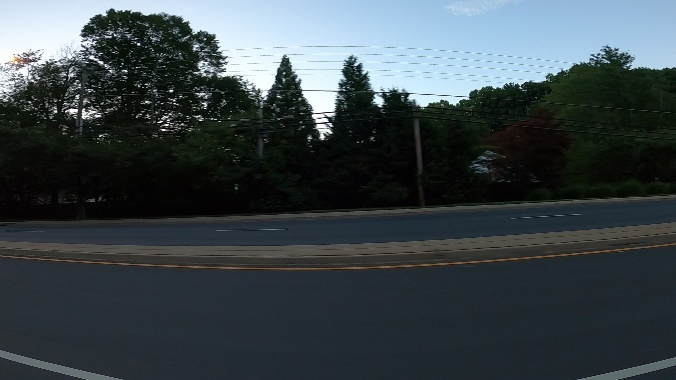

In [8]:
Image(filename=f'OUTPUT/exp/{random.choice(predicted_files)}')

In [17]:
#!python yolov5/train.py --batch 2 --epochs 1 --data yolov5-config/car.yaml --cfg yolov5-config/yolov5x.yaml --name yolov5x_fold0_new